In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
np_files = glob.glob("force_test_*_for*.npy")

In [3]:
damge_files = glob.glob("force_test_*_damage_*.txt")

In [10]:
forces_numbers = {}

max_len = 0

for f in np_files:
    force = int(f.split("_")[2])
    force_numbers = np.load(f)
    max_len = max([len(force_numbers), max_len])
    forces_numbers[force] = force_numbers[:,2]
    

In [11]:
damage_awn = {}

for f in damge_files:
    force = int(f.split("_")[2])
    awn = open(f).read()
    damage_awn[force] = awn

In [12]:
keys = list(forces_numbers.keys())
keys = np.sort(keys)

findfont: Font family ['Linux Libertine T'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Linux Libertine T'] not found. Falling back to DejaVu Sans.


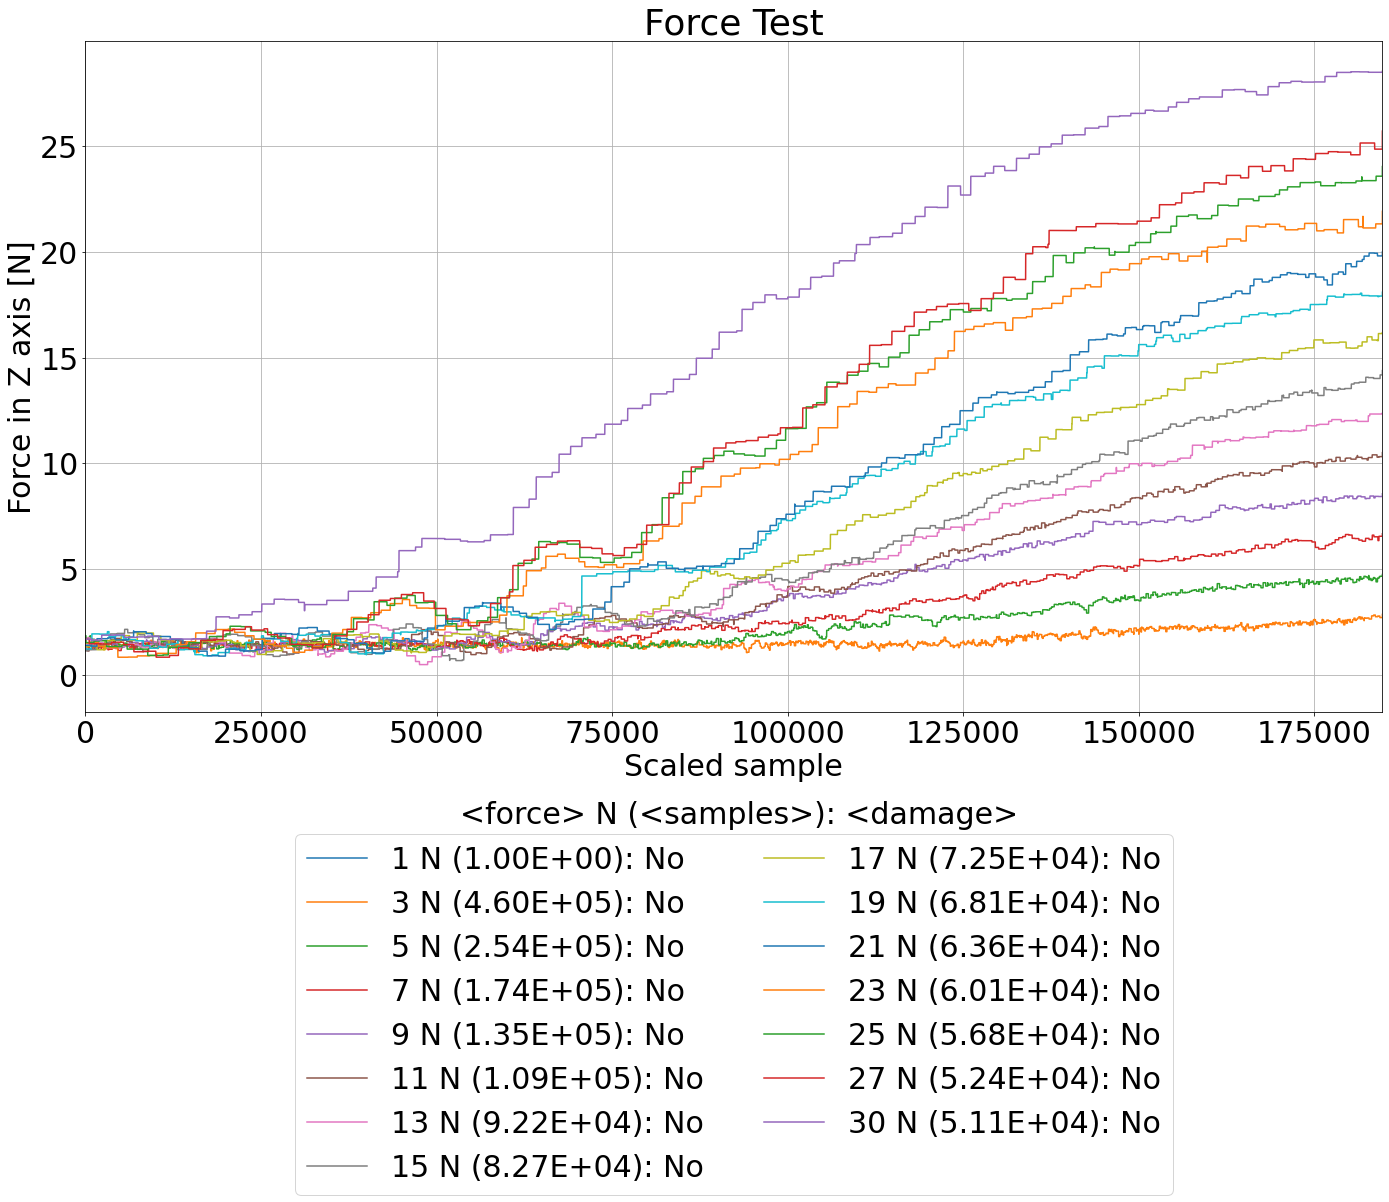

In [95]:
plt.figure(figsize=(20,20))

plt.rcParams["font.family"] = "Linux Libertine T"
plt.rcParams["font.size"] = "30"

#plt.plot([], [], ' ', label="<force> N (<samples>): <damage>")

for forc in keys:
    numbers = forces_numbers[forc]
    
    scale_x = np.linspace(0, max_len, len(numbers))
    
    plt.plot(scale_x, numbers, label="{} N ({:.2E}): {}".format(forc, len(numbers), damage_awn[forc].capitalize()))
    
plt.xlim(275_000, max_len)
locs, labels = plt.xticks()
labels = ['0','25000', '50000', '75000', '100000', '125000', '150000', '175000', '200000']
plt.xticks(locs, labels)
plt.xlim(275_000, max_len)


plt.legend(bbox_to_anchor=(0.15,-0.45), loc="center left", ncol=2)
plt.grid()
plt.title("Force Test")
plt.xlabel("Scaled sample")
plt.ylabel("Force in Z axis [N]")


plt.text(max_len-max_len//3.5,-7,"<force> N (<samples>): <damage>")
plt.tight_layout()

plt.savefig("Force_test.pdf")
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
force_hist = np.load("f300c704-2fec-457e-9f01-0fc5a6490df8_force.npy")
pose_hist = np.load("f300c704-2fec-457e-9f01-0fc5a6490df8_pose.npy")

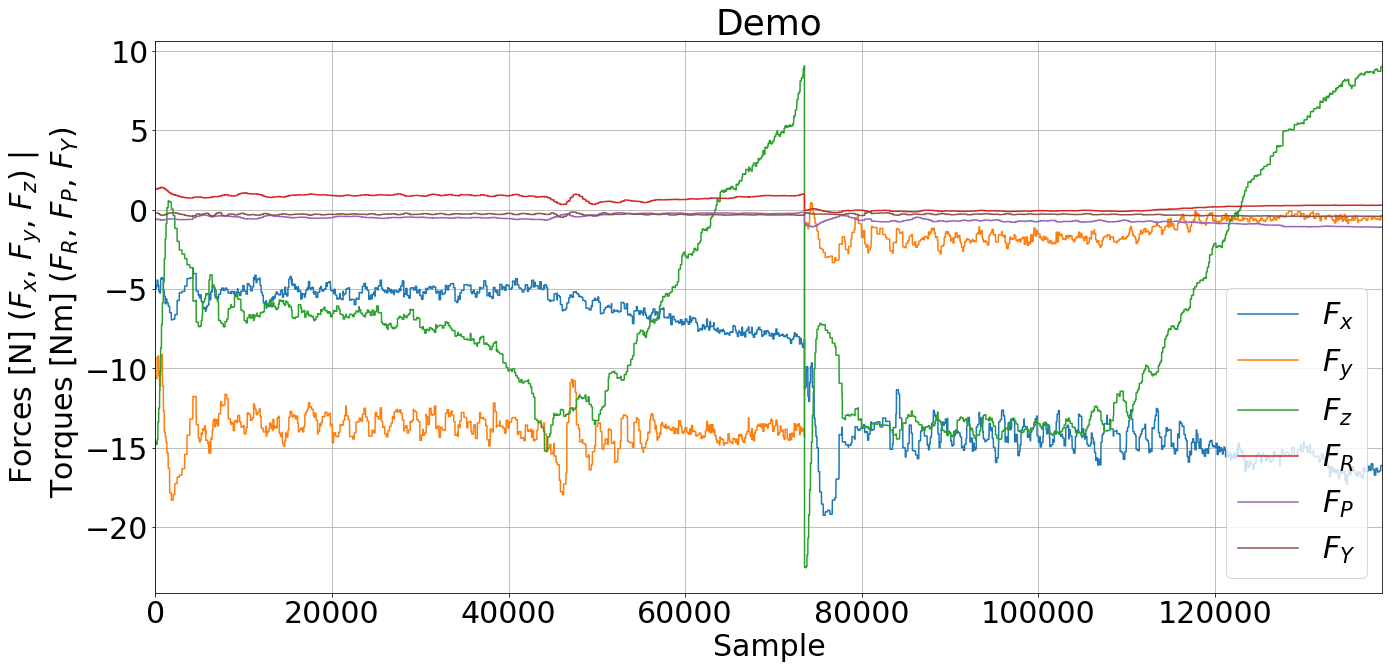

In [29]:
names = ["$F_x$", "$F_y$", "$F_z$", "$F_{R}$", "$F_{P}$", "$F_{Y}$"]

plt.figure(figsize=(20,10))

plt.rcParams["font.family"] = "Linux Libertine T"
plt.rcParams["font.size"] = "30"

els = np.array(force_hist).T

for i, el in enumerate(els):
    name = f"{i}"
    name = names[i]

    plt.plot(el, label=name)

plt.xlim(0, len(force_hist))    
plt.grid()
plt.legend()
plt.title("Demo")
plt.xlabel("Sample")
plt.ylabel("Forces [N] ($F_x$, $F_y$, $F_z$) |\n Torques [Nm] ($F_{R}$, $F_{P}$, $F_{Y}$)")

plt.tight_layout()
plt.savefig("Demo.pdf")
plt.show()

